# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset, but on a new and very interesting dataset. We'll use the [Predict'em All](https://www.kaggle.com/semioniy/predictemall) dataset from Kaggle (download the dataset directly from them). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), having coordinates, time, weather, population density, distance to pokestops/ gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to ping-pong must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. [The python docs](https://docs.python.org/3/), [keras docs](https://keras.io/), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

## 0. Imports

Import any necessary modules here.

In [6]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

## 1. Loading and extracting subset

Load the `'300k.csv'` file using pandas.

In [9]:
data = pd.read_csv('300k.csv', dtype={'pokestopDistanceKm': object})

Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [40]:
df = data[['latitude', 'longitude', 'class']]

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [41]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [42]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td>![Diglett](https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png)</td>
    <td>![Seel](https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf)</td>
    <td>![Tauros](https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616)</td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [43]:
pokemons = ['Diglett', 'Seel', 'Tauros']
df = df[df['class'].isin([name_dict[p] for p in pokemons])]
df = df.assign(name=[name_dict[id] for id in df['class']])

## 2. Visualization of the dataset

Plot histogram of the number of occurrences of each class.

Diglett    721
Seel       692
Tauros     670
Name: name, dtype: int64


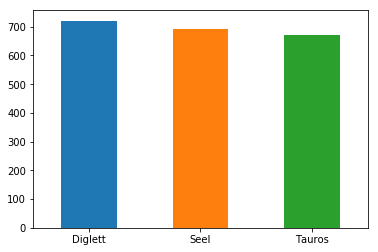

In [44]:
fig, ax = plt.subplots()
counts = df['name'].value_counts()
print(counts)
counts.plot(ax=ax, kind='bar')
plt.xticks(rotation='horizontal')
plt.show()

Is the dataset balanced?

**Your answer**: Since each class in the dataset has roughtly the same number of data samples (as can be seen from the chart above), our dataset is relatively balanced.

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

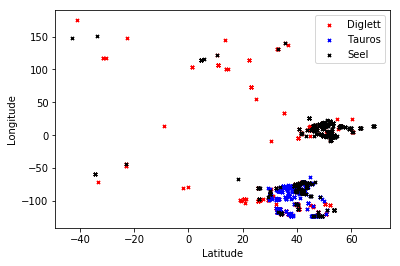

In [45]:
x = df['latitude']
y = df['longitude']
fig, ax = plt.subplots()
color_dict = {'Diglett': 'r', 'Seel': 'k', 'Tauros': 'b'}
for name in df['name'].unique():
    mask = df['name'] == name
    ax.scatter(x[mask], y[mask], marker='x', label=name, c=color_dict[name], s=10)
ax.legend()
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

Is there any other visualization you think would be useful? If so, insert it here.

In [46]:
# No other visualizations that I can think of.

How hard do you think the problem is? Which classes can/cannot be easily separated?

**Your answer**: From the 2D figure above, I think the problem would be hard to solve. The majority of the red dots (representing Diglett) are actually mixed with the blue (representing Tauros) and the black dots (representing Seel), thus making it hard to separate Diglett from the other 2 pokemons. Worse, the red dots are mostly concentrated around 2 big blobs (that are quite separated from one another), so I would say that this problem requires a bit of non-linearity in the solution in order to achieve a good accuracy. One good thing is that the blue and the black dots seem to be much better separated.

Which accuracy do you expect to achieve?

**Your answer**: Picking a class completely randomly would give us 1/3 chance of getting the correct answer (since the classes are quite balanced). We would get the same accuracy if all the 3 pokemons are spread equally well around the world. However, in this case, we have the blue and the black dots being relatively well-separated (while the red dots are not). So assuming that we can predict perfectly the blue and black dots, and randomly for the red dots, then the probability of picking right is around 1/2. So with a good neural network, I would expect the accuracy to be higher than 50%.

## 3. Preprocessing

Prepare input and output vectors.

In [47]:
# Input numerical matrix
x = df[['latitude', 'longitude']].values
y = pd.get_dummies(df['class']).values

Separate your data into training and test sets. 20% of the data should be in the test set.

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

## 4. Training

Choose an architecture for your network.

In [49]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(3, input_dim=16, activation='softmax'))
model.compile(Adam(lr=0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Train the network. When training, separate 25% of your training data into a validation set.

In [50]:
model.fit(xtrain, ytrain, epochs=20, validation_split=0.25, verbose=2)

Train on 1249 samples, validate on 417 samples
Epoch 1/20
 - 1s - loss: 4.7725 - acc: 0.4027 - val_loss: 2.9348 - val_acc: 0.5084
Epoch 2/20
 - 0s - loss: 2.1777 - acc: 0.5669 - val_loss: 2.0011 - val_acc: 0.6547
Epoch 3/20
 - 0s - loss: 1.8593 - acc: 0.6397 - val_loss: 1.9389 - val_acc: 0.6571
Epoch 4/20
 - 0s - loss: 1.5603 - acc: 0.6437 - val_loss: 1.4201 - val_acc: 0.6595
Epoch 5/20
 - 0s - loss: 1.1088 - acc: 0.6317 - val_loss: 1.1849 - val_acc: 0.5540
Epoch 6/20
 - 0s - loss: 1.1873 - acc: 0.5749 - val_loss: 1.0564 - val_acc: 0.6211
Epoch 7/20
 - 0s - loss: 0.9960 - acc: 0.6237 - val_loss: 0.9862 - val_acc: 0.6331
Epoch 8/20
 - 0s - loss: 0.9335 - acc: 0.6309 - val_loss: 0.9512 - val_acc: 0.6139
Epoch 9/20
 - 0s - loss: 0.9183 - acc: 0.6205 - val_loss: 0.9350 - val_acc: 0.5923
Epoch 10/20
 - 0s - loss: 0.9103 - acc: 0.6157 - val_loss: 0.8856 - val_acc: 0.6091
Epoch 11/20
 - 0s - loss: 0.8901 - acc: 0.6253 - val_loss: 0.8345 - val_acc: 0.6523
Epoch 12/20
 - 0s - loss: 0.8920 - acc

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [51]:
ypred = model.predict(xtest)
ytest_class = np.argmax(ytest, axis=1)
ypred_class = np.argmax(ypred, axis=1)
acc = accuracy_score(ytest_class, ypred_class)
print("Accuracy: %.2f" % acc)

Accuracy: 0.62


Compute the confusion matrix of your predictions on the test set.

In [52]:
confusion_matrix(ytest_class, ypred_class)

array([[105,  33,  13],
       [ 19,  78,  30],
       [ 64,   0,  75]], dtype=int64)

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Answer**: First I would create a list of longitudes and latitudes of all the places that I'm able to travel to (if I'm able to travel to any places in the world, then this list is simply just a grid of longitudes and latitudes). Then I would use the model that I've trained above to predict on this list of places. The prediction results will be filtered out to only contain the one pokemon that I want to catch next.

Is(are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer**: I can't say beforehand which features might be valuable to add as an input feature to the neural net, because this data doesn't really come from some natural or human phenomena, which means normal intuition wouldn't really apply. The best way to manually see which feature might be important is just to plot the histograms as shown below. After manually checking each feature one by one, I decided that "pressure" and "terrainType" seem to be among the best.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

In [117]:
def plotHist(df, pokemons, feature):
    df_feature = df[[feature]]
    
    for pokemon in pokemons:
        fig, ax = plt.subplots()
        values = df_feature[df['name'] == pokemon][feature]
        
        if is_numeric_dtype(values) and values.dtype != 'bool':
            values.plot(ax=ax, kind='hist', title=pokemon, legend=None)
        else:
            values.value_counts().plot(ax=ax, kind='bar', title=pokemon, color='g')  
        ax.set_xlabel(feature)

pokemons = ['Diglett', 'Seel', 'Tauros']
df = data[data['class'].isin([name_dict[p] for p in pokemons])]
df = df.assign(name=[name_dict[id] for id in df['class']])

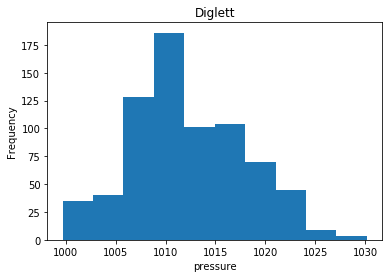

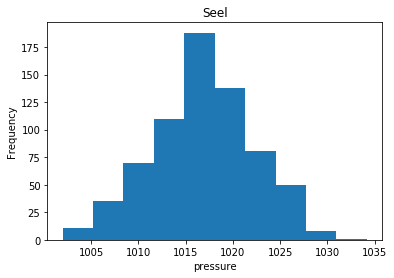

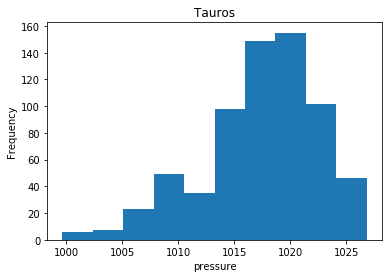

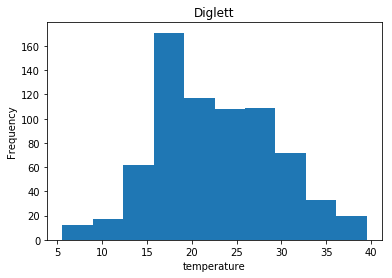

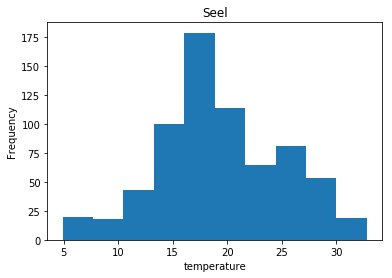

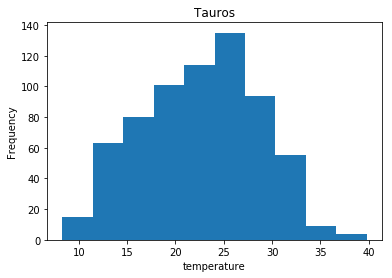

In [128]:
plotHist(df, pokemons, 'pressure')
plotHist(df, pokemons, 'temperature')

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer**: The goal of plotting the histograms is to see which feature is able to distinguish between the 3 pokemons that we have. For a particular feature, if the histogram distributions are the similar for all of the classes, then we can predict that the feature is probabably not very good, and we shouldn't include it as part of the classifier. As you can see from the histograms, pressure is doing sort of OK. Here, speaking in terms of distributions' shapes and locations, Diglett seems to have lower pressure than Seel, which then in turns has lower pressure than Tauros. Thus I would say including Pressure would probably be a good idea. As for temperature, it's hard to say from the histogram whether it can be used to distinguish between the classes at all. So we probably shouldn't put temperature as part of the sets of input features.

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?